# US Labor Productivity
In this notebook I analyze the trends in US Labor productivity as measured by output per hour. All analysis is in real terms, i.e. accounting for effects of inflation, and using seasonally adjusted data.

For the sake of comparison, I also look at labor productivity trends in the major EU economies.

In [1]:
# Uncomment if running in Google Colaboratory, otherwise the import of the curves module in the cell below will fail
#!git clone -l -s https://github.com/ilchen/US_Economic_Data_Analysis.git cloned-repo
#%cd cloned-repo

# Install the latest version of eurostat
# !pip install eurostat -U

In [2]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import pandas_datareader.data as web
from dateutil.relativedelta import relativedelta
from datetime import date

import eurostat

In [3]:
report_start = date.fromisoformat('1969-01-01')
report_end = date.today()

## Data Inputs for US Labor Productivity
The U.S. Bureau of Labor Statistics (BLS) publishes different series of labor productivity that cover different subsets of the economy. However none of them covers the whole US economy fully. This is because the total economy includes several sectors in which it is difficult to measure productivity. These include general government, nonprofit institutions, paid employees of private households, and rental of owner-occupied houses. The broadest measure of productivity published by the BLS therefore excludes these sectors and is known as the business sector. Business sector output accounted for about 88.4 percent of the value of gross domestic product (GDP) in Q1 2023.

In this notebook, in addition to the Business Sector labor productivity, I also looke at the Nonfinancial Corporations Sector and Manufacturing Sector. These latter two are both subsets of the Business Sector.

In [4]:
labor_prod = web.get_data_fred(['OPHPBS', 'OPHMFG', 'PRS88003093', ], start=report_start, end=report_end)

In [5]:
LABOR_PROD_PBS_COLUMN_NAME = 'Business Sector'
LABOR_PROD_MFG_COLUMN_NAME = 'Manufacturing Sector'
LABOR_PROD_NFC_COLUMN_NAME = 'Nonfinancial Corporations Sector'


GRAPH_TITLE_LABOR_PROD = 'US Labor Productivity: Output per Hour (2012=100)'
GRAPH_TITLE_LABOR_PROD_PCT = 'US Labor Productivity: Annual percentage changes in output'
GRAPH_TITLE_LABOR_PROD_PCT_CHG = 'US Labor Productivity: Percentage changes in output'

labor_prod.rename(
    columns={'OPHPBS': LABOR_PROD_PBS_COLUMN_NAME, 'OPHMFG': LABOR_PROD_MFG_COLUMN_NAME,
             'PRS88003093': LABOR_PROD_NFC_COLUMN_NAME},
    inplace=True)

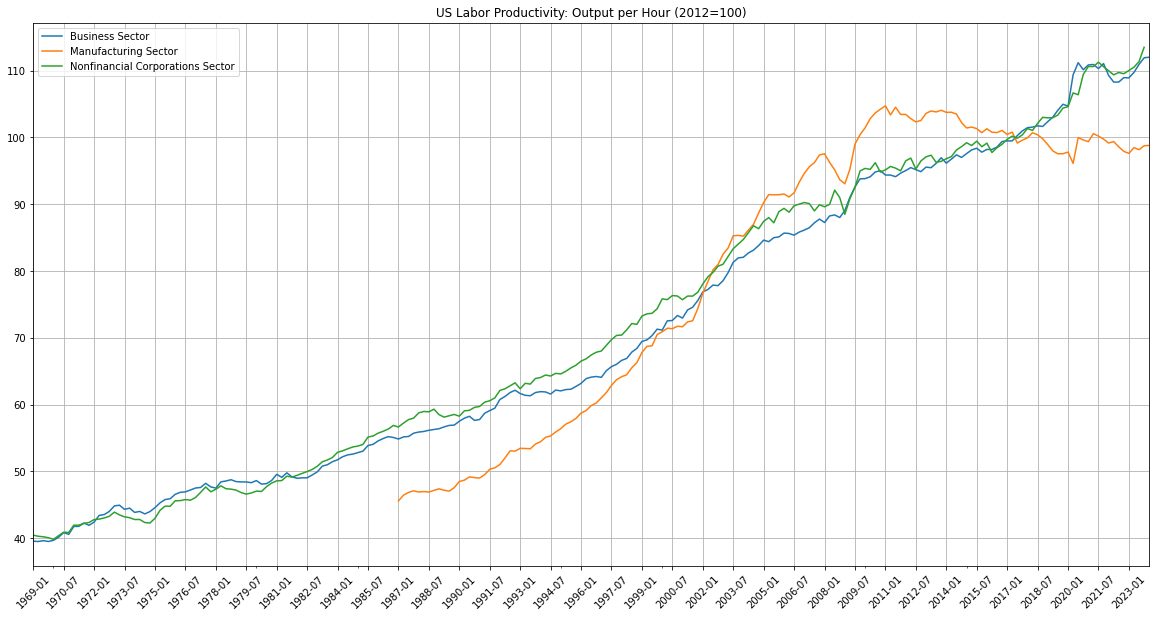

In [6]:
ax = labor_prod.plot(figsize=(20,10), grid=True, title=GRAPH_TITLE_LABOR_PROD,
                     xticks=labor_prod.index[::6], xlabel='', rot=45)
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, labor_prod.index[::6])))

#### Last 10 years

In [7]:
labor_prod_last_10y = labor_prod.loc[labor_prod.index[-1].date()+relativedelta(years=-10):]

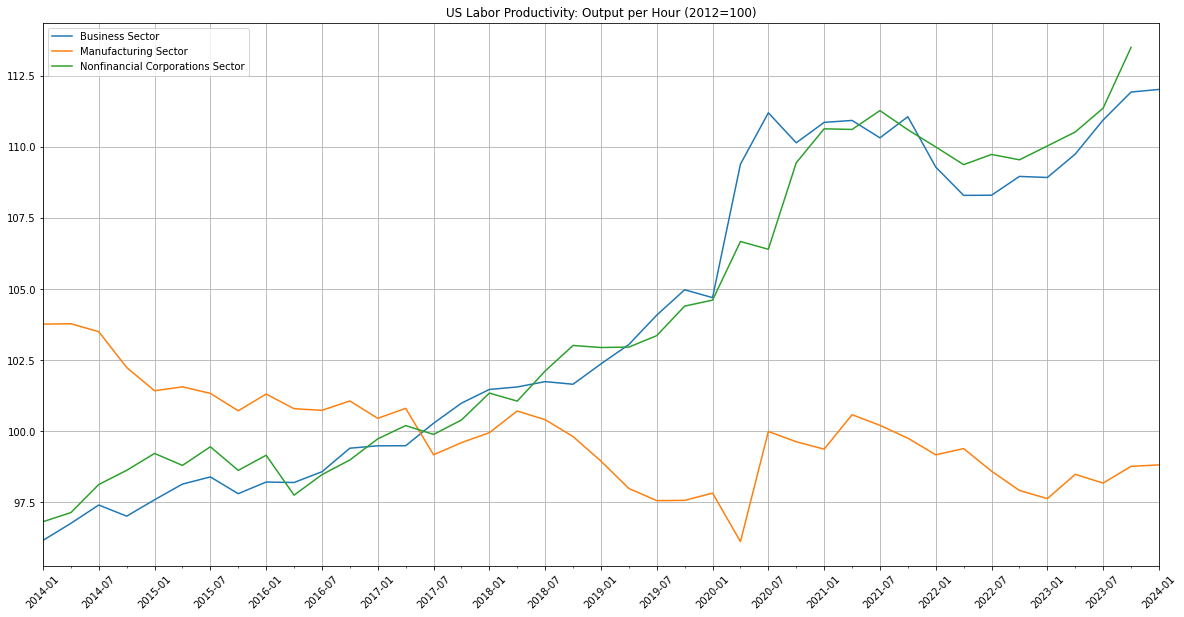

In [8]:
ax = labor_prod_last_10y.plot(figsize=(20,10), grid=True, title=GRAPH_TITLE_LABOR_PROD,
                     xticks=labor_prod_last_10y.index[::2], xlabel='', rot=45)
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, labor_prod_last_10y.index[::2])))

## Annual Percentage Changes in Labor Productivity in US

In [9]:
# Convert to annual percentage changes
labor_prod_pct_chg = labor_prod.pct_change(4, fill_method='bfill')

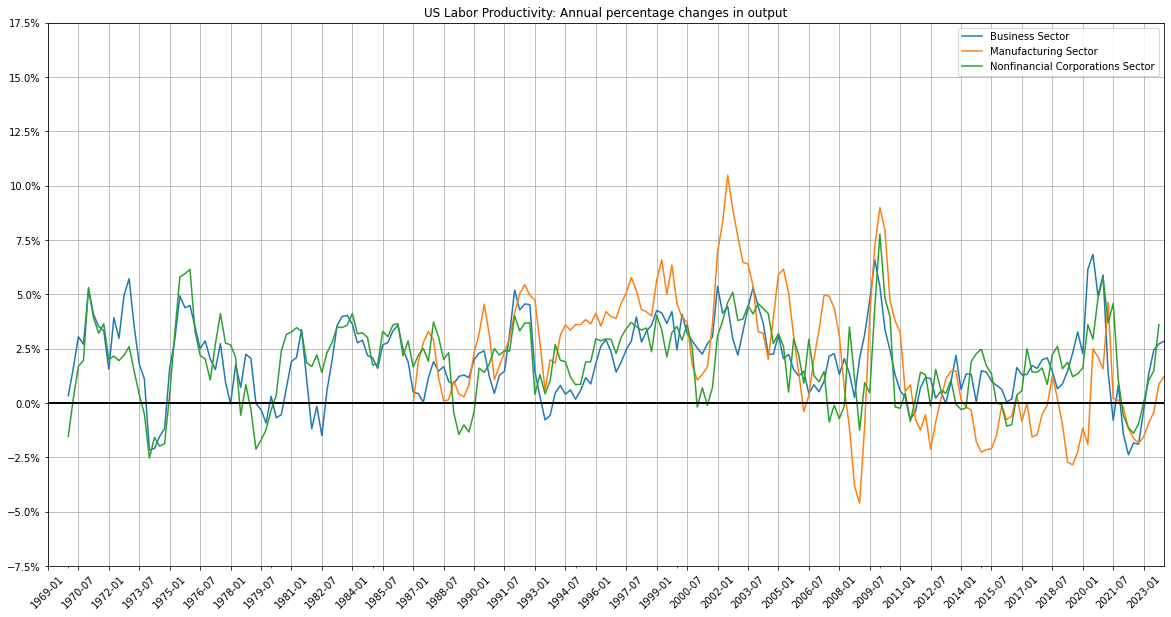

In [10]:
ax = labor_prod_pct_chg.plot(figsize=(20,10), grid=True, title=GRAPH_TITLE_LABOR_PROD_PCT,
                     xticks=labor_prod_pct_chg.index[::6], xlabel='', rot=45, yticks=np.arange(-.075, .2, 0.025))
ax.axhline(y=0, lw=2, c='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, labor_prod_pct_chg.index[::6])))

#### Last 10 years

In [11]:
labor_prod_pct_chg_last_10y = labor_prod_pct_chg.loc[labor_prod_pct_chg.index[-1].date()+relativedelta(years=-10):]

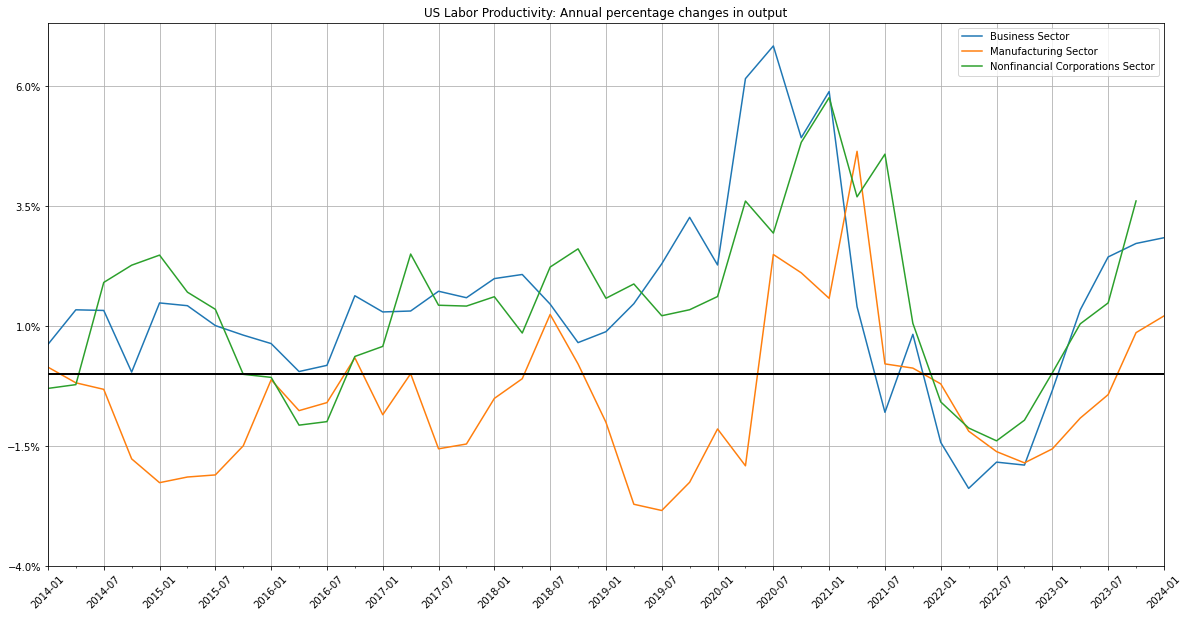

In [12]:
ax = labor_prod_pct_chg_last_10y.plot(figsize=(20,10), grid=True, title=GRAPH_TITLE_LABOR_PROD_PCT,
                     xticks=labor_prod_pct_chg_last_10y.index[::2], xlabel='', rot=45, yticks=np.arange(-.04, .075, 0.025))
ax.axhline(y=0, lw=2, c='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, labor_prod_pct_chg_last_10y.index[::2])))

## Percentage Changes in Labor Productivity in US in last 5 and 10 Years
The most representative of the below-depicted measures are percentage cnages in the labor productivity of Business Sector. As I explained in the beginning of this notebook, the Business Sector makes up approximately 88% of the US GDP and includes the other two sectors shown &mdash; the Nonfinancial Corporations Sector and Manufacturing Sectos &mdash; as subsets.

**NB**: Feel free to change to specify other values in the `periods` list in the cell below if you are interested in analyzing differences in output over a different number of years.

In [13]:
# Analyzing changes in output over the past 10 and 5 years. Feel free to change to other values as appropriate.
# periods = [5, 2]
periods = [10, 5]

labor_prod_pct_chg = pd.concat([labor_prod.pct_change(4*period).iloc[-1] for period in periods], axis=1)
labor_prod_pct_chg.columns = ['Over past {:d} years'.format(period) for period in periods]

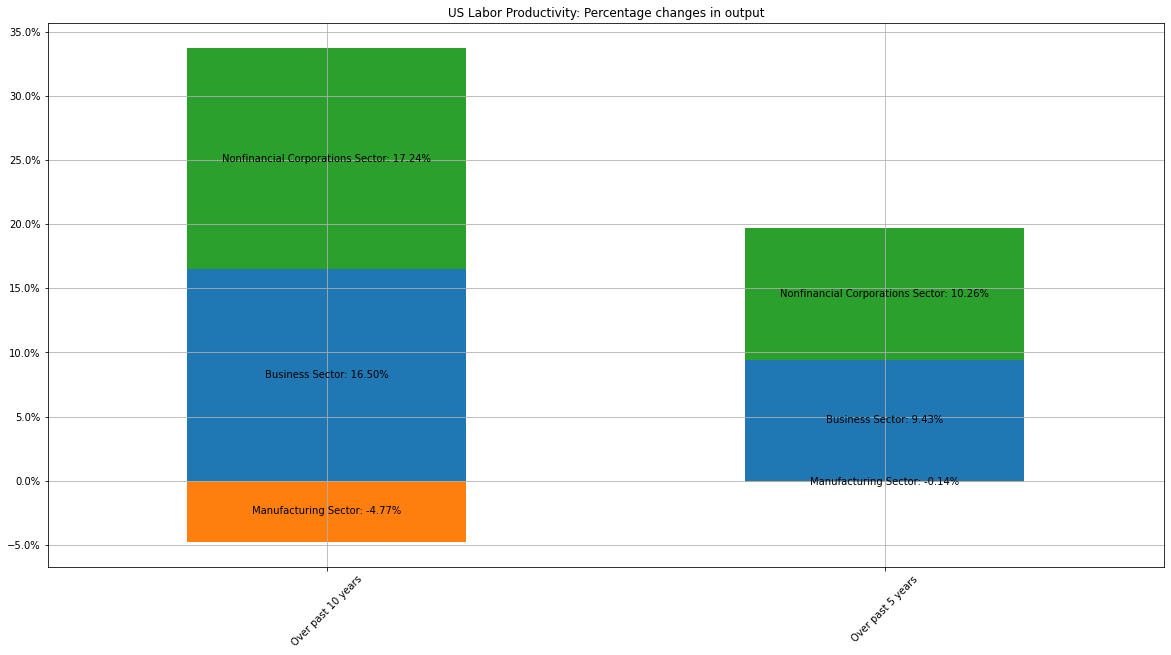

In [14]:
ax = labor_prod_pct_chg.T.plot.bar(figsize=(20,10), grid=True, title=GRAPH_TITLE_LABOR_PROD_PCT_CHG,
                                          stacked=True, rot=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.get_legend().remove()
for c in ax.containers:
    ax.bar_label(c, fmt=c.get_label() + ': {:.2%}', label_type='center')

## Labour Productivity Analysis for the EU and its Major Economies
In the below part of the notebook, I look at the labor productivity trends in the EU's 5 largest economies by their GDP: Germany, France, Italy, Spain, the Netherlands. As well as at the EU as a whole in its current formation of 27 meber states.

For the sake of consistency with the analysis of US labor productivity earlier in this notebook, I use real labor productivity per hour worked as the measure used.

In [15]:
# Using Eurozone labor productivity index 2015=100, seasonally adjusted, real labor productivity per hour worked
eu_labor_prod = eurostat.get_data_df('namq_10_lp_ulc',
               filter_pars={'startPeriod': report_start, 'unit': 'I15',
                            's_adj': 'SCA', 'na_item': 'RLPR_HW',
                            'geo': ['EU27_2020', 'DE', 'FR', 'IT', 'ES', 'NL']}).iloc[:, 4:]

eu_labor_prod = eu_labor_prod.set_index(eu_labor_prod.columns[0]).T
eu_labor_prod = eu_labor_prod.set_axis(pd.DatetimeIndex(eu_labor_prod.index, 'QS'))
eu_labor_prod = eu_labor_prod.loc[eu_labor_prod.iloc[:,1].first_valid_index():]
eu_labor_prod.columns.names = [None]

In [16]:
GRAPH_TITLE_EU_LABOR_PROD = 'EU Labor Productivity: Output per Hour (2015=100)'
GRAPH_TITLE_EU_LABOR_PROD_PCT = 'EU Labor Productivity: Annual percentage changes in output'
GRAPH_TITLE_EU_LABOR_PROD_PCT_CHG = 'EU Labor Productivity: Percentage changes in output'
GRAPH_TITLE_EU_US_LABOR_PROD_PCT_CHG = 'EU and US Labor Productivity: Percentage changes in output'

eu_labor_prod.rename(
    columns={'EU27_2020': 'European Union (27 countries)', 'DE': 'Germany',
             'NL': 'The Netherlands', 'FR': 'France', 'IT': 'Italy', 'ES': 'Spain', 'PL': 'Poland'},
    inplace=True)

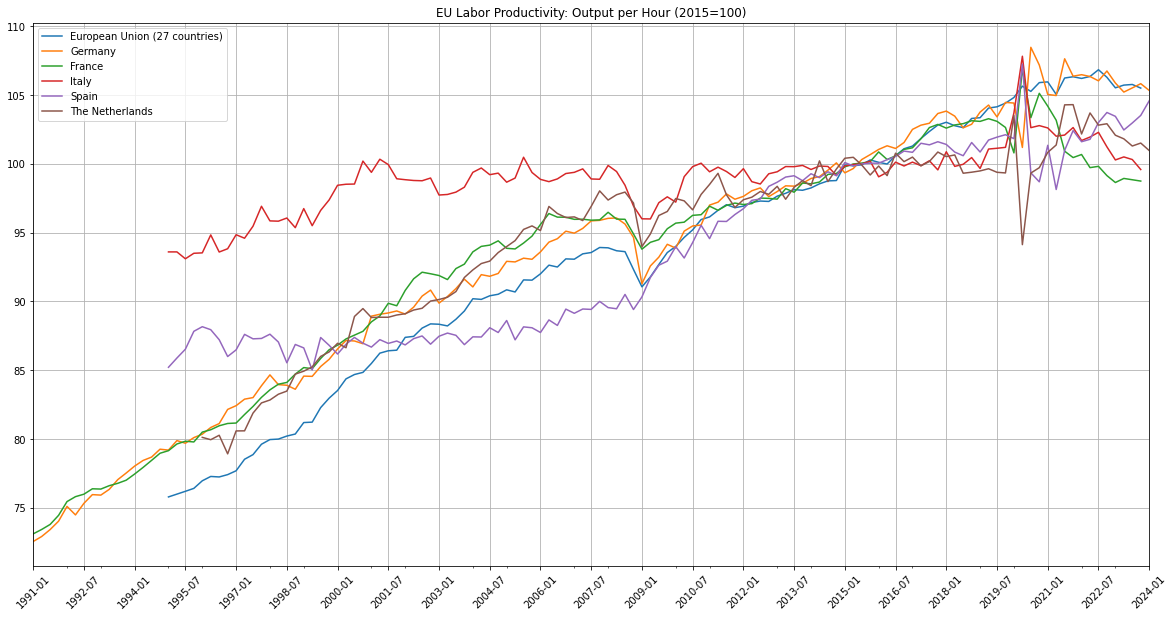

In [17]:
ax = eu_labor_prod.plot(figsize=(20,10), grid=True, title=GRAPH_TITLE_EU_LABOR_PROD,
                     xticks=eu_labor_prod.index[::6], xlabel='', rot=45)
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, eu_labor_prod.index[::6])))

### Percentage Changes in Labor Productivity in EU in last 5 and 10 Years

In [18]:
eu_labor_prod_pct_chg = pd.concat([eu_labor_prod.pct_change(4*period).iloc[-1] for period in periods], axis=1)
eu_labor_prod_pct_chg.columns = ['Over past {:d} years'.format(period) for period in periods]

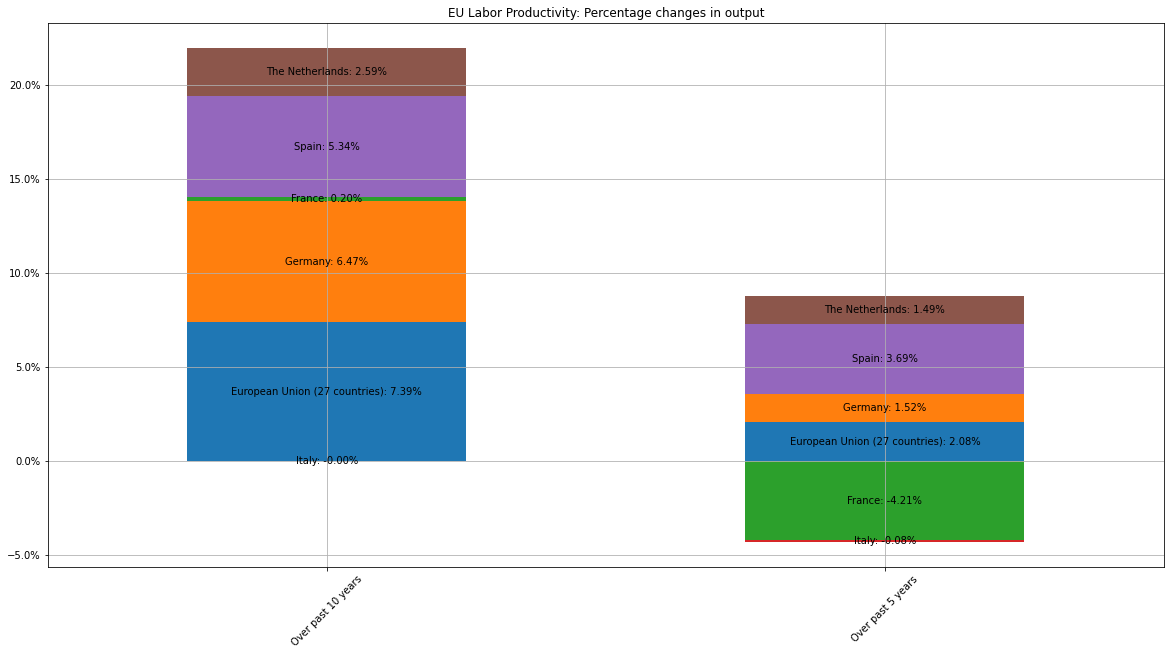

In [19]:
ax = eu_labor_prod_pct_chg.T.plot.bar(figsize=(20,10), grid=True, title=GRAPH_TITLE_EU_LABOR_PROD_PCT_CHG,
                                      stacked=True, rot=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.get_legend().remove()
for c in ax.containers:
    ax.bar_label(c, fmt=c.get_label() + ': {:.2%}', label_type='center')

**Conclusion:** The reason that the overall EU labor productivity growth eclipses that of the EU's 5 largest economies &mdash; Germany, France, Italy, Spain, the Netherlands &mdash; is due to much higher labor productivity growth in the new EU member states from Easter Europe such as Poland.

Let's combine the EU percentage changes in labor productivity over the past 10 and 5 years with those in the US, using the broadest available sector that best represents the US Economy &mdash; the Business Sector.

In [20]:
eu_labor_prod_pct_chg.loc['US ({:s})'.format(labor_prod_pct_chg.index[0])] = labor_prod_pct_chg.iloc[0, :]

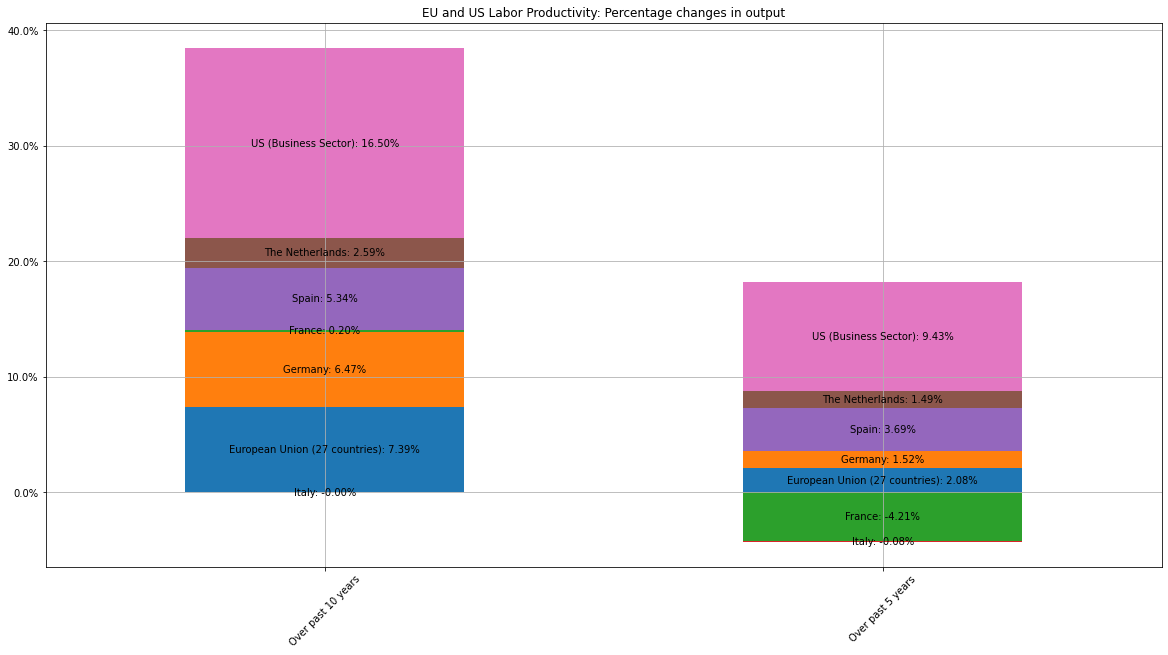

In [21]:
ax = eu_labor_prod_pct_chg.T.plot.bar(figsize=(20,10), grid=True, title=GRAPH_TITLE_EU_US_LABOR_PROD_PCT_CHG,
                                      stacked=True, rot=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.get_legend().remove()
for c in ax.containers:
    ax.bar_label(c, fmt=c.get_label() + ': {:.2%}', label_type='center')